In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.io import loadmat
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [105]:
df = pd.read_csv('marriage.csv', header=None).to_numpy()
X = df[:, :-1]
y = df[:, -1]

## 2
### Part 1
### a

In [106]:
def plot_decision_boundary(X, y, X_train, y_train, X_test, y_test, clf_dict):
    clf = clf_dict['clf']
    name = clf_dict['name']
    filename = clf_dict['fn']
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    #           edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    #           edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    fig.savefig(filename)

In [107]:
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3836)
bayes = GaussianNB(priors=None, var_smoothing = 1e-03)
logit = LogisticRegression()
knn = KNeighborsClassifier()
pca = PCA(n_components=2)

In [108]:
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)
print(f"Naive Bayes accuracy: {bayes.score(X_test, y_test)}")

Naive Bayes accuracy: 1.0


In [109]:
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
print(f"Logistic Regression Accuracy: {logit.score(X_test, y_test)}")

Logistic Regression Accuracy: 0.9411764705882353


In [110]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f"K Nearest Neighbors Accuracy: {knn.score(X_test, y_test)}")

K Nearest Neighbors Accuracy: 1.0


### b

In [111]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [112]:
bayes.fit(X_train_pca, y_train)
bayes_pca_pred = bayes.predict(X_test_pca)
print(f"Naive Bayes PCA Accuracy: {bayes.score(X_test_pca, y_test)}")

Naive Bayes PCA Accuracy: 1.0


In [113]:
logit.fit(X_train_pca, y_train)
logit_pca_pred = logit.predict(X_test_pca)
print(f"Logistic Regession PCA Accuracy: {logit.score(X_test_pca, y_test)}")

Logistic Regession PCA Accuracy: 1.0


In [114]:
knn.fit(X_train_pca, y_train)
knn_pca_pred = knn.predict(X_test_pca)
print(f"K Nearest Neighbors PCA Accuracy: {knn.score(X_test_pca, y_test)}")

K Nearest Neighbors PCA Accuracy: 1.0


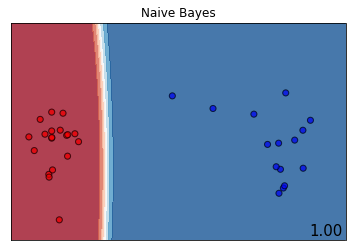

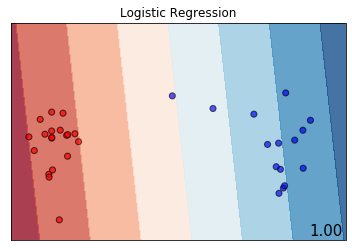

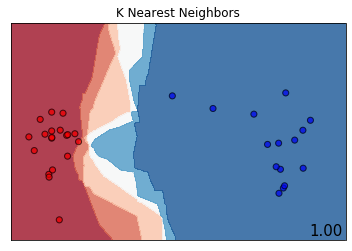

In [115]:
classifiers = [
    {'clf': bayes, 'name': 'Naive Bayes', 'fn': 'HW4_part1b_bayes.png'}, 
    {'clf': logit, 'name': 'Logistic Regression', 'fn': 'HW4_part1b_logit.png'},
    {'clf': knn, 'name': 'K Nearest Neighbors', 'fn': 'HW4_part1b_knn.png'}
]
for cls in classifiers:
    plot_decision_boundary(
        X_pca, 
        y,
        X_train_pca,
        y_train.ravel(),
        X_test_pca,
        y_test.ravel(),
        cls)

### Part 2 
### a

In [116]:
X_mnist = loadmat('data.mat')['data']
y_mnist = loadmat('label.mat')['trueLabel']

In [117]:
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist.T, y_mnist.T, test_size=.2, random_state=3836)

In [118]:
bayes.fit(X_train_mnist, y_train_mnist.ravel())
bayes_pred_mnist = bayes.predict(X_test_mnist)
print(f"Naive Bayes MNIST Accuracy: {bayes.score(X_test_mnist, y_test_mnist)}")

Naive Bayes MNIST Accuracy: 0.9195979899497487


In [119]:
logit.fit(X_train_mnist, y_train_mnist.ravel())
logit_pred_mnist = logit.predict(X_test_mnist)
print(f"Logistic Regression MNIST Accuracy: {logit.score(X_test_mnist, y_test_mnist)}")

Logistic Regression MNIST Accuracy: 0.964824120603015


In [120]:
knn.fit(X_train_mnist, y_train_mnist.ravel())
knn_pred_mnist = knn.predict(X_test_mnist)
print(f"K Nearest Neighbor MNIST Accuracy: {knn.score(X_test_mnist, y_test_mnist)}")

K Nearest Neighbor MNIST Accuracy: 0.9874371859296482


### b

In [121]:
pca.fit(X_train_mnist)
X_mnist_pca = pca.transform(X_mnist.T)
X_train_mnist_pca = pca.transform(X_train_mnist)
X_test_mnist_pca = pca.transform(X_test_mnist)

In [122]:
classifiers = [
    {'clf': bayes, 'name': 'Naive Bayes', 'fn': 'HW4_part2b_bayes.png'}, 
    {'clf': logit, 'name': 'Logistic Regression', 'fn': 'HW4_part2b_logit.png'},
    {'clf': knn, 'name': 'K Nearest Neighbors', 'fn': 'HW4_part2b_knn.png'}
]


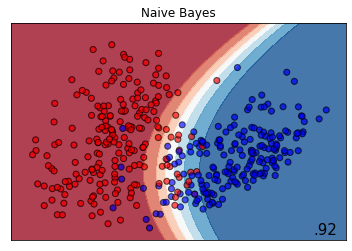

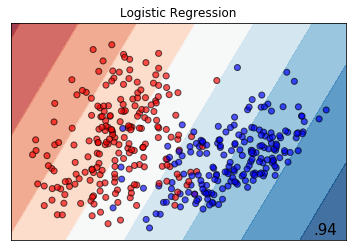

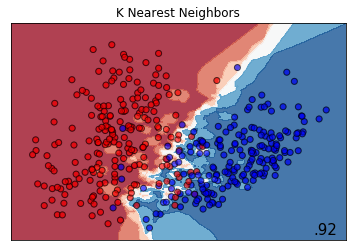

In [123]:
for cls in classifiers:
    plot_decision_boundary(
        X_mnist_pca, 
        y_mnist,
        X_train_mnist_pca,
        y_train_mnist.ravel(),
        X_test_mnist_pca,
        y_test_mnist.ravel(),
        cls)

## 3
### a

In [124]:
V = np.array(['secret', 'offer', 'low', 'price', 'valued', 'customer', 'today', 'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza'])
s = np.array(['million dollar offer','secret offer today','secret is secret'])
ns = np.array(['low price for valued customer','play secret sports today','sports is healthy','low price pizza'])

In [125]:
spam = np.zeros([s.shape[0], V.shape[0]])
notspam = np.zeros([ns.shape[0], V.shape[0]])

In [126]:
for i in range(len(s)):
    msg = s[i]
    for word in msg.split():
        for j in range(len(V)):
            if word == V[j]:
                spam[i, j] += 1


In [127]:
for i in range(len(ns)):
    msg = ns[i]
    for word in msg.split():
        for j in range(len(V)):
            if word == V[j]:
                notspam[i, j] += 1

In [128]:
dfs = pd.DataFrame(spam, columns=V)
dfs

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
dfns = pd.DataFrame(notspam, columns=V)
dfns

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
X = np.concatenate([spam, notspam])
y = np.array(np.zeros([s.shape[0]]).tolist()+ np.ones([ns.shape[0]]).tolist())

In [131]:
X, y

(array([[0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([0., 0., 0., 1., 1., 1., 1.]))

In [132]:
sprob = np.sum(y==0) / y.shape[0]
nsprob = np.sum(y==1)/ y.shape[0]
print(f'P(y=0) Spam: {sprob}')
print(f'P(y=1) Not Spam:  {nsprob}')

P(y=0) Spam: 0.42857142857142855
P(y=1) Not Spam:  0.5714285714285714


### b

In [133]:
df = pd.DataFrame(X, columns=V)
df

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
def theta(X, y, colname, label):
    return X[colname][y==label].sum() / X[y==label].sum().sum()

In [135]:
print(f'theta(0,1) = P({V[0]} | spam) = {theta(df, y, V[0], 0)}')
print(f'theta(0,7) = P({V[6]} | spam) = {theta(df, y, V[6], 0)}')
print(f'theta(1,1) = P({V[0]} | non-spam) = {theta(df, y, V[0], 1)}')
print(f'theta(1,15) = P({V[14]} | non-spam) = {theta(df, y, V[14], 1)}')

theta(0,1) = P(secret | spam) = 0.3333333333333333
theta(0,7) = P(today | spam) = 0.1111111111111111
theta(1,1) = P(secret | non-spam) = 0.06666666666666667
theta(1,15) = P(pizza | non-spam) = 0.06666666666666667


### c

In [136]:
msg = "today is secret"

In [137]:
sprob = 1
nsprob = 1
for word in msg.split():
    sprob *= theta(df, y, word, 0)
    nsprob *= theta(df, y, word, 1)
print(f"Probability that '{msg}' is spam: {sprob}")
print(f"Probability that '{msg}' is not spam {nsprob}")

Probability that 'today is secret' is spam: 0.004115226337448559
Probability that 'today is secret' is not spam 0.0002962962962962963


In [138]:
print (f"'{msg}' is categorized as spam")

'today is secret' is categorized as spam
